In [1]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
import torch
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=False
                                , transform=None)

In [20]:
print(mnist_trainset[0][0])

<PIL.Image.Image image mode=L size=28x28 at 0x1C35F71C90>


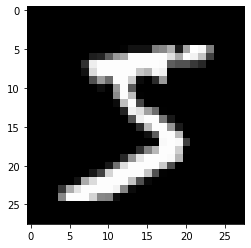

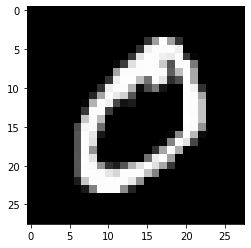

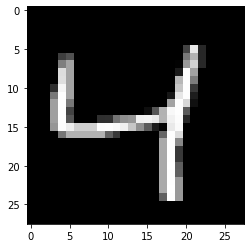

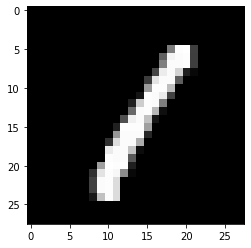

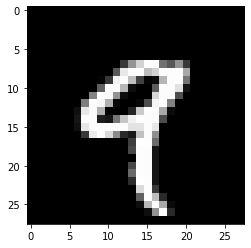

In [23]:
plt.gray()
for i in range(5):
    image = mnist_trainset[i][0]
    image= np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(image)
    plt.show()

In [4]:
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-90, 90)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def resize(image_array:ndarray):
    return  transform.resize(image_array, (128, 128))

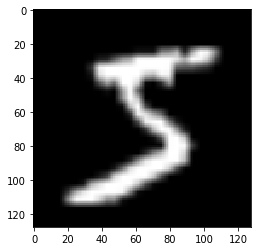

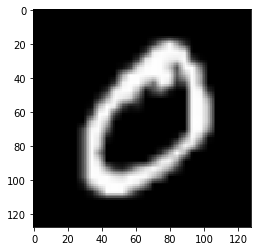

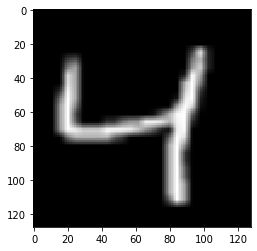

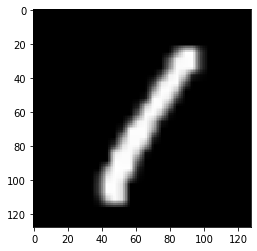

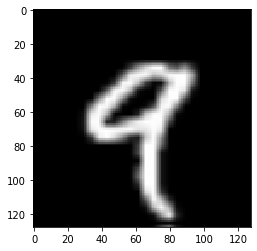

In [34]:
label=[]
images=[]
for i in range(5):
    image = mnist_trainset[i][0]
    image= np.array(image, dtype='float')
    image = resize(image)
    #pixels = image.reshape((1, 28))
    #plt.imshow(image)
    #plt.show()

In [5]:
labels=[]
images=[]
for i in range(len(mnist_trainset)):
    image = mnist_trainset[i][0]
    labels.append(mnist_trainset[i][1])
    image= np.array(image, dtype='float')
    #rotate
    image = random_rotation(image)
    #resize
    image = resize(image)
    images.append(image)

In [9]:
#check dimension
print(len(images))
print(len(labels))

60000
60000


# Output

In [11]:
import pickle
file = open('minist_data.pkl', 'wb')
# Pickle dictionary using protocol 0.
pickle.dump(images, file)
file.close()

In [13]:
import csv
wtr = csv.writer(open ('out.csv', 'w'), delimiter=',', lineterminator='\n')
for x in labels : wtr.writerow ([x])

In [ ]:
'''for i in range(len(mnist_trainset)):
    image = mnist_trainset[i][0]
    labels.append(mnist_trainset[i][1])
    image= np.array(image, dtype='float')
    image = resize(image)
    images.append(image)'''